<a href="https://colab.research.google.com/github/wesley0521/House-price-predict-data-engineering/blob/main/House_price_predict_data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data["MSSubClass"] = train_data["MSSubClass"].astype(str)
test_data["MSSubClass"] = test_data["MSSubClass"].astype(str)
train_data["MoSold"] = train_data["MoSold"].astype(str)
test_data["MoSold"] = test_data["MoSold"].astype(str)
train_data = train_data.drop(['Id'],axis=1)
test_data = test_data.drop(['Id'],axis=1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

/tmp/ipython-input-4206133006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

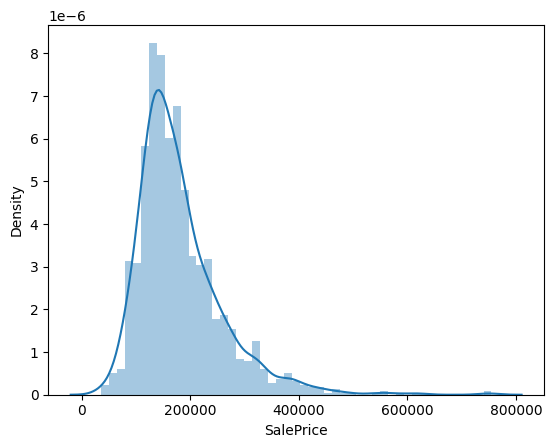

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train_data['SalePrice'])

/tmp/ipython-input-3670616390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['YrSold'],kde=False)


<Axes: xlabel='YrSold'>

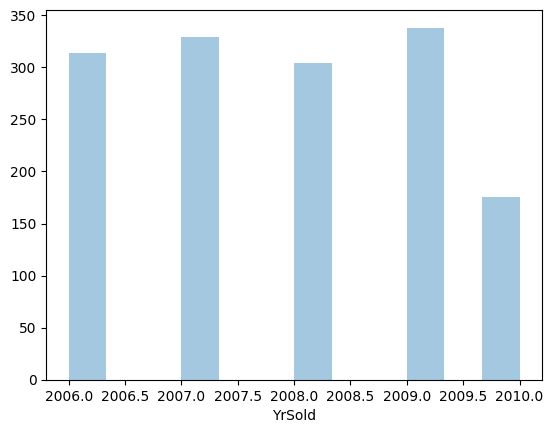

In [ ]:
sns.distplot(train_data['YrSold'],kde=False)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

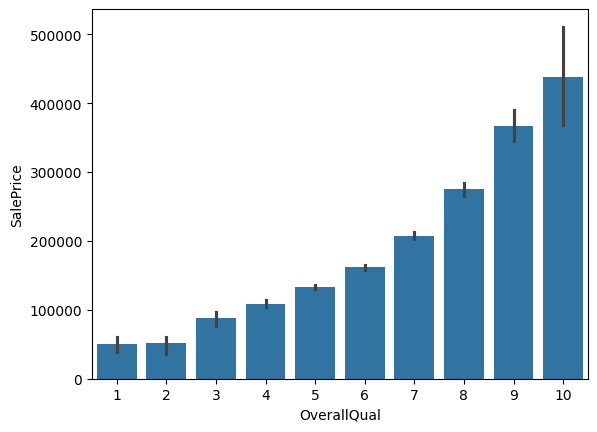

In [ ]:
sns.barplot(x="OverallQual",y="SalePrice",data=train_data)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

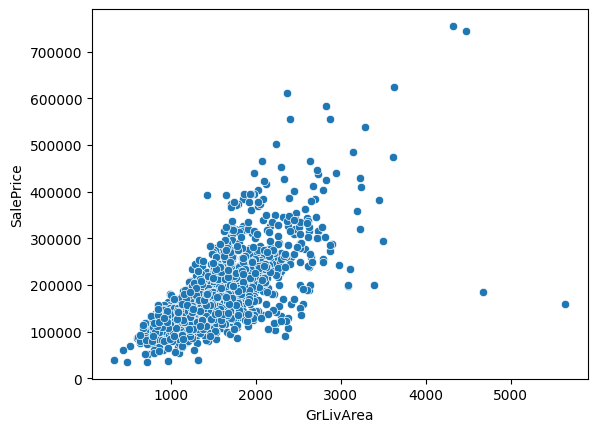

In [ ]:
sns.scatterplot(x="GrLivArea",y="SalePrice",data=train_data)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

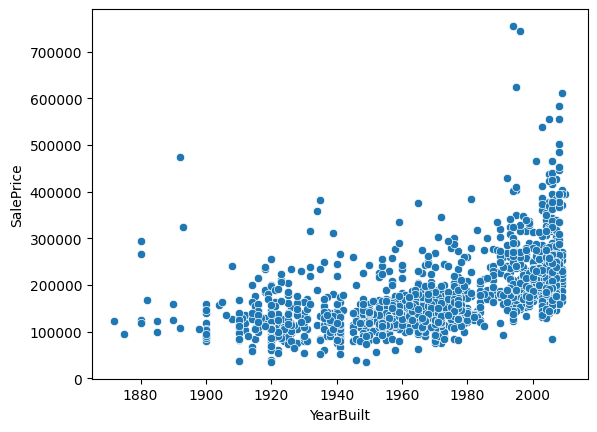

In [ ]:
sns.scatterplot(data=train_data,x='YearBuilt',y='SalePrice')

<Axes: >

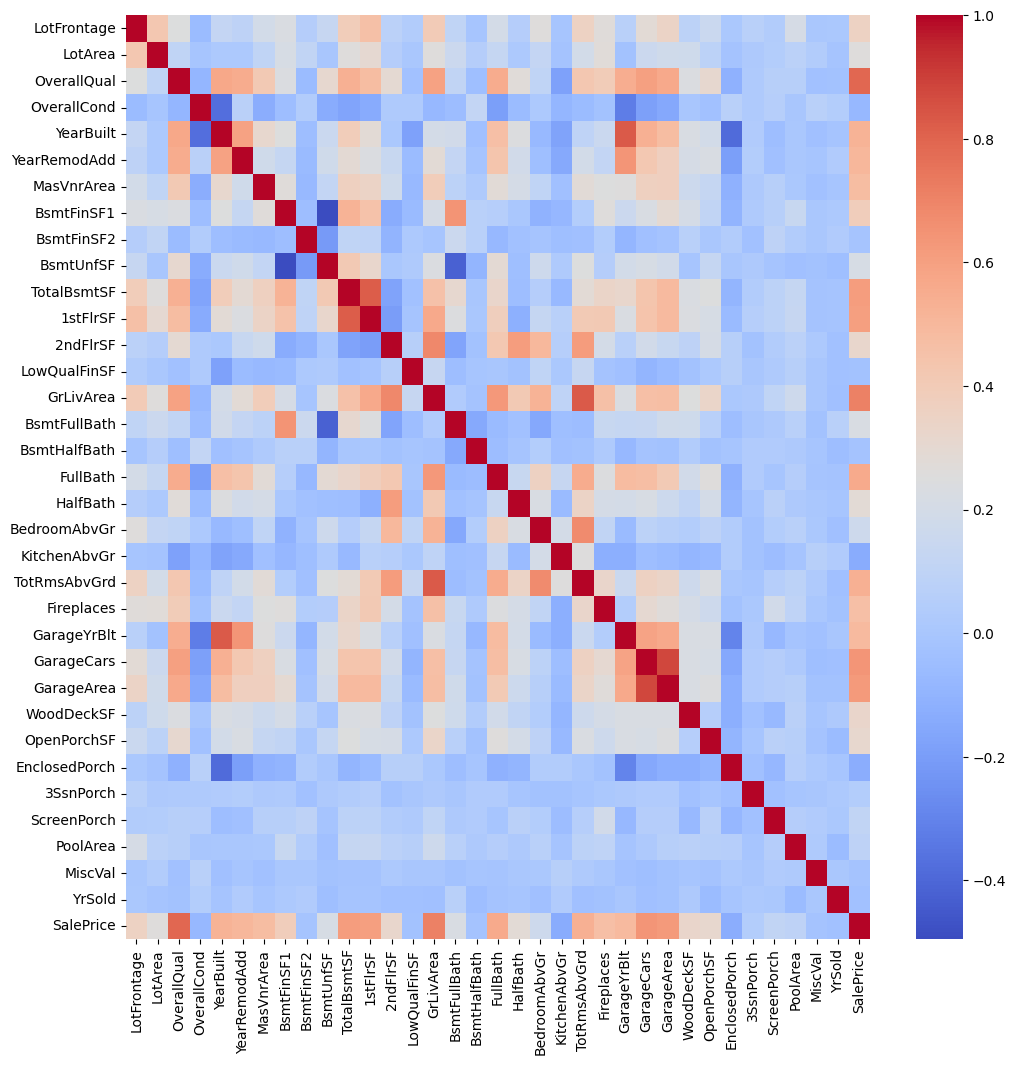

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(numeric_only=True),cmap='coolwarm')

<Axes: >

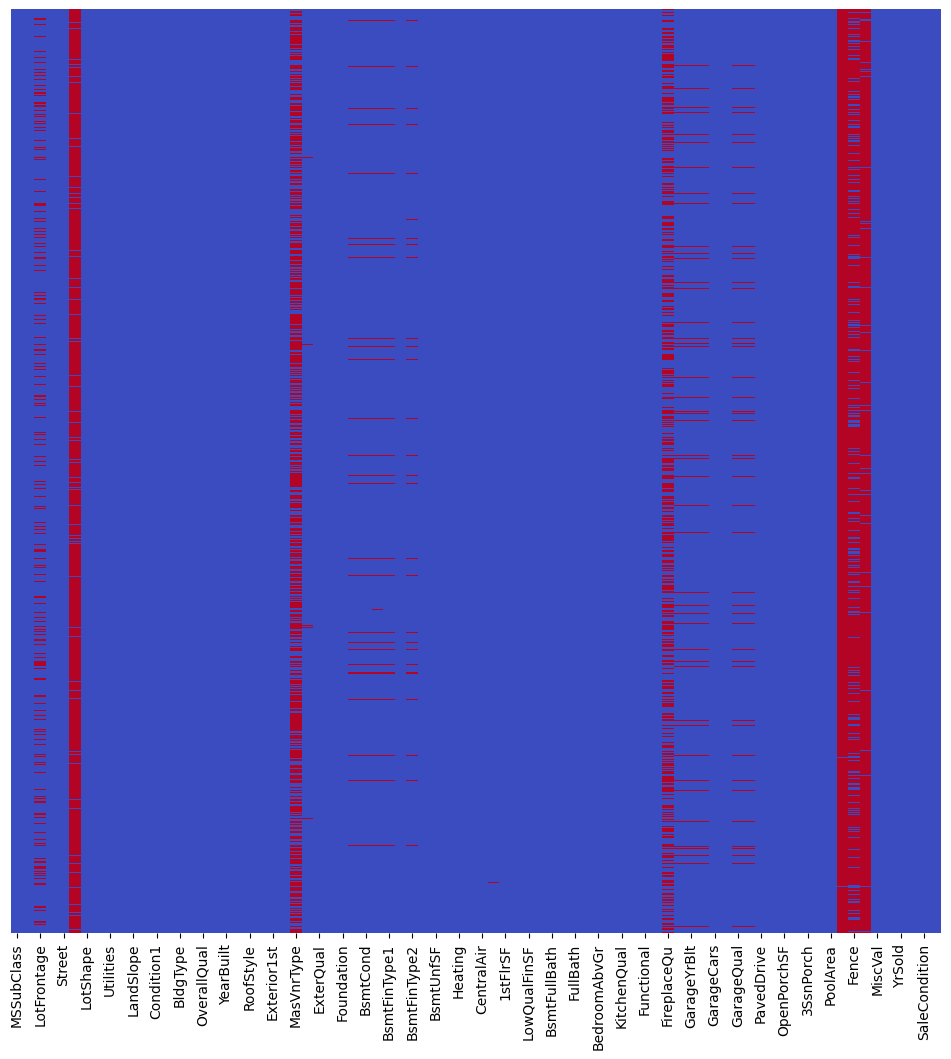

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.isnull(),cmap='coolwarm',cbar=False,yticklabels=False)

In [ ]:
missing_data = [col for col in train_data.columns if train_data.isnull().sum()[col]>500]
print(missing_data)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
train_data = train_data.drop(missing_data,axis=1)
test_data = test_data.drop(missing_data,axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
train_without_sales = train_data.drop(['SalePrice'],axis=1)

In [ ]:
train_without_sales

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
num_col = [col for col in train_without_sales.columns if train_without_sales[col].dtype!='object']
cat_col = [col for col in train_without_sales.columns if train_without_sales[col].dtype=='object']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])
impute_train = pipeline.fit_transform(train_without_sales[num_col])
impute_test = pipeline.transform(test_data[num_col])

In [ ]:
impute_train = pd.DataFrame(impute_train,columns=num_col)
impute_test = pd.DataFrame(impute_test,columns=num_col)

In [ ]:
impute_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,-0.944591,...,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777
1,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,-0.641228,...,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.614439
2,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,-0.301643,...,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777
3,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,-0.061670,...,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.367655
4,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,-0.174865,...,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,0.873321,...,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.614439
1456,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,0.049262,...,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.645210
1457,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,0.701265,...,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,1.645210
1458,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,-1.284176,...,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,1.645210


In [ ]:
impute_train_reverse = pipeline.named_steps['scaler'].inverse_transform(impute_train)
impute_test_reverse = pipeline.named_steps['scaler'].inverse_transform(impute_test)

In [ ]:
impute_train_reverse = pd.DataFrame(impute_train_reverse,columns=num_col)
impute_test_reverse = pd.DataFrame(impute_test_reverse,columns=num_col)
impute_train_reverse

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,1.960000e+02,706.0,0.0,150.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2008.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,-1.421085e-14,978.0,0.0,284.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,1.620000e+02,486.0,0.0,434.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,2008.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,-1.421085e-14,216.0,0.0,540.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2006.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,3.500000e+02,655.0,0.0,490.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,5.0,1999.0,2000.0,-1.421085e-14,0.0,0.0,953.0,...,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,2007.0
1456,85.0,13175.0,6.0,6.0,1978.0,1988.0,1.190000e+02,790.0,163.0,589.0,...,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0
1457,66.0,9042.0,7.0,9.0,1941.0,2006.0,-1.421085e-14,275.0,0.0,877.0,...,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,2010.0
1458,68.0,9717.0,5.0,6.0,1950.0,1996.0,-1.421085e-14,49.0,1029.0,0.0,...,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,2010.0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
impute_train_cat = imputer.fit_transform(train_without_sales[cat_col])
impute_test_cat = imputer.transform(test_data[cat_col])

In [ ]:
impute_train_cat = pd.DataFrame(impute_train_cat,columns=cat_col)
impute_test_cat = pd.DataFrame(impute_test_cat,columns=cat_col)
impute_train_cat[["ExterQual"]].value_counts()

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
def ordinalEncoder_train(target_train,target_test,tar_list):
  encoder = OrdinalEncoder(categories=tar_list)
  encode_train = encoder.fit_transform(target_train)
  encode_data = encoder.transform(target_test)
  return encode_train,encode_data
order_list = [['Fa', 'TA', 'Gd', 'Ex']]
impute_train_cat["ExterQual"],impute_test_cat["ExterQual"] = ordinalEncoder_train(impute_train_cat[["ExterQual"]],impute_test_cat[["ExterQual"]],order_list)
impute_train_cat["BsmtQual"],impute_test_cat["BsmtQual"] = ordinalEncoder_train(impute_train_cat[["BsmtQual"]],impute_test_cat[["BsmtQual"]],order_list)
order_list = [['Po' ,'Fa', 'TA', 'Gd']]
impute_train_cat["BsmtCond"],impute_test_cat["BsmtCond"] = ordinalEncoder_train(impute_train_cat[["BsmtCond"]],impute_test_cat[["BsmtCond"]],order_list)
order_list = [['No' ,'Mn', 'Av', 'Gd']]
impute_train_cat["BsmtExposure"],impute_test_cat["BsmtExposure"] = ordinalEncoder_train(impute_train_cat[["BsmtExposure"]],impute_test_cat[["BsmtExposure"]],order_list)
order_list = [['Unf' ,'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
impute_train_cat["BsmtFinType1"],impute_test_cat["BsmtFinType1"] = ordinalEncoder_train(impute_train_cat[["BsmtFinType1"]],impute_test_cat[["BsmtFinType1"]],order_list)
order_list = [['Unf' ,'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
impute_train_cat["BsmtFinType2"],impute_test_cat["BsmtFinType2"] = ordinalEncoder_train(impute_train_cat[["BsmtFinType2"]],impute_test_cat[["BsmtFinType2"]],order_list)
order_list = [['Po' ,'Fa', 'TA', 'Gd', 'Ex']]
impute_train_cat["HeatingQC"],impute_test_cat["HeatingQC"] = ordinalEncoder_train(impute_train_cat[["HeatingQC"]],impute_test_cat[["HeatingQC"]],order_list)
old_or_mixed_fuses = ['FuseF', 'FuseP', 'Mix']
impute_train_cat.loc[impute_train_cat['Electrical'].isin(old_or_mixed_fuses), 'Electrical'] = 'Old_or_Mixed_Fuse'
impute_test_cat.loc[impute_test_cat['Electrical'].isin(old_or_mixed_fuses), 'Electrical'] = 'Old_or_Mixed_Fuse'
order_list = [['Old_or_Mixed_Fuse' ,'FuseA', 'SBrkr']]
impute_train_cat["Electrical"],impute_test_cat["Electrical"] = ordinalEncoder_train(impute_train_cat[["Electrical"]],impute_test_cat[["Electrical"]],order_list)
order_list = [['Fa', 'TA', 'Gd', 'Ex']]
impute_train_cat["KitchenQual"],impute_test_cat["KitchenQual"] = ordinalEncoder_train(impute_train_cat[["KitchenQual"]],impute_test_cat[["KitchenQual"]],order_list)
maj_sev = ['Sev', 'Maj2', 'Maj1']
impute_train_cat.loc[impute_train_cat['Functional'].isin(maj_sev), 'Functional'] = 'Maj_Sev'
impute_test_cat.loc[impute_test_cat['Functional'].isin(maj_sev), 'Functional'] = 'Maj_Sev'
order_list = [['Maj_Sev', 'Mod', 'Min2', 'Min1', 'Typ']]
impute_train_cat["Functional"],impute_test_cat["Functional"] = ordinalEncoder_train(impute_train_cat[["Functional"]],impute_test_cat[["Functional"]],order_list)
order_list = [['Unf', 'RFn', 'Fin']]
impute_train_cat["GarageFinish"],impute_test_cat["GarageFinish"] = ordinalEncoder_train(impute_train_cat[["GarageFinish"]],impute_test_cat[["GarageFinish"]],order_list)
order_list = [['Po' ,'Fa', 'TA', 'Gd', 'Ex']]
impute_train_cat["GarageQual"],impute_test_cat["GarageQual"] = ordinalEncoder_train(impute_train_cat[["GarageQual"]],impute_test_cat[["GarageQual"]],order_list)
order_list = [['Po' ,'Fa', 'TA', 'Gd', 'Ex']]
impute_train_cat["GarageCond"],impute_test_cat["GarageCond"] = ordinalEncoder_train(impute_train_cat[["GarageCond"]],impute_test_cat[["GarageCond"]],order_list)

In [ ]:
final_train = pd.concat([impute_train_reverse,impute_train_cat],axis=1)
final_test = pd.concat([impute_test_reverse,impute_test_cat],axis=1)

In [ ]:
concat = pd.concat([final_train,final_test],ignore_index=True)

In [ ]:
onehot = pd.get_dummies(concat)

In [ ]:
final_train = onehot.iloc[:len(final_train),:]
final_test = onehot.iloc[len(final_train):,:]

In [ ]:
scaler = StandardScaler()
final_train = scaler.fit_transform(final_train)
final_test = scaler.transform(final_test)

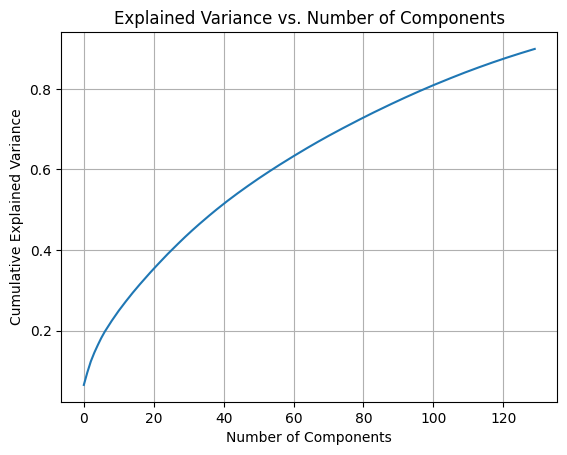

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 假設 final_train 和 final_test 是你的 DataFrame

# 1. 在訓練集上初始化並訓練 PCA 模型
# 這一步會計算主成分並將其儲存在 pca 物件中
pca = PCA(n_components=130)
pca.fit(final_train)

# 2. 使用這個已經訓練好的模型來轉換訓練集和測試集
final_train_pca = pca.transform(final_train)
final_test_pca = pca.transform(final_test)

# 你仍然可以使用你的繪圖程式碼
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

<Axes: >

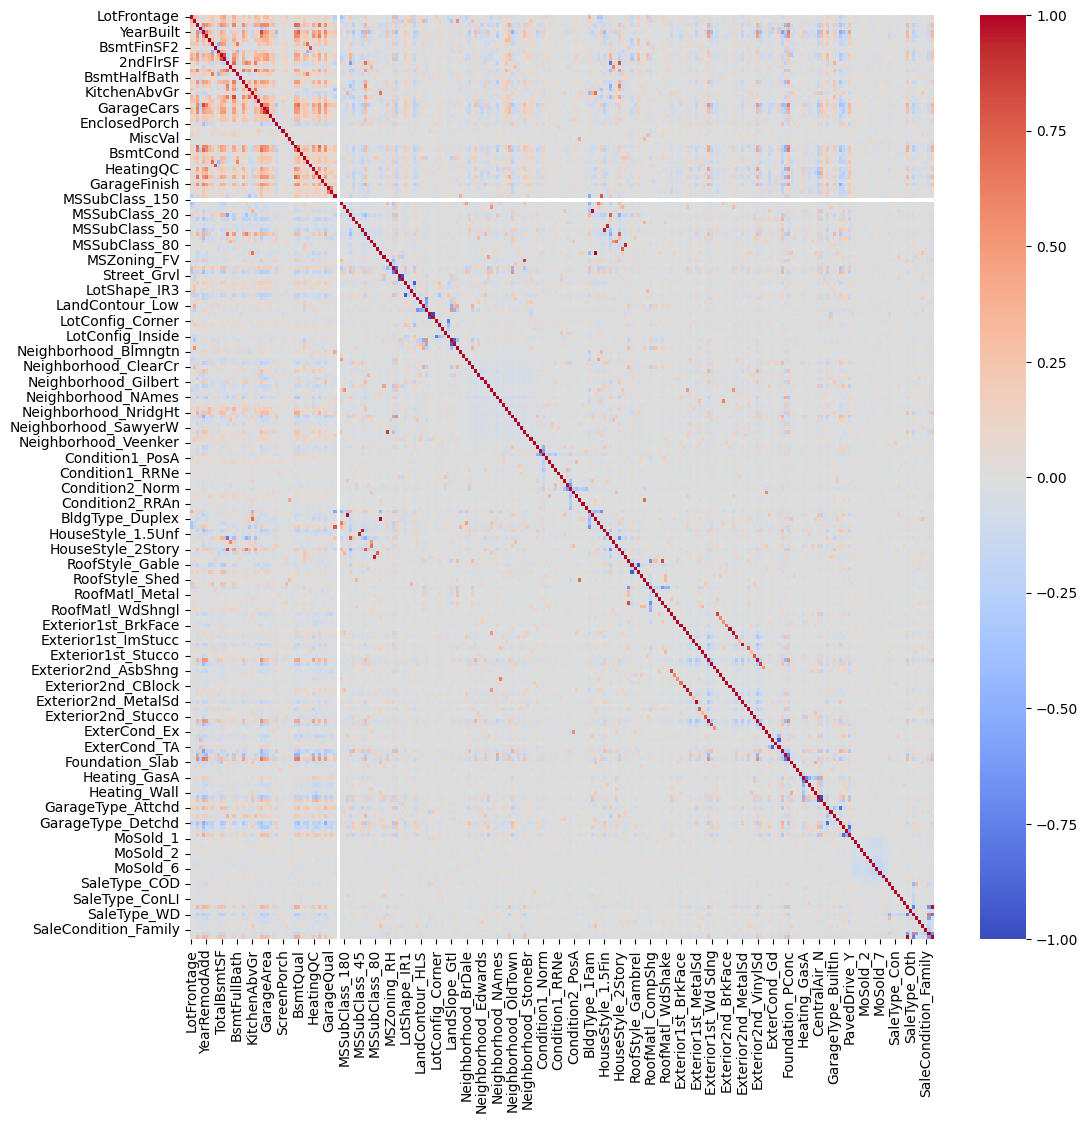

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(final_train.corr(numeric_only=True),cmap='coolwarm')

In [ ]:
final_train["TotalBaths"] = final_train["BsmtFullBath"] + (0.5 * final_train["BsmtHalfBath"]) + final_train["FullBath"] + (0.5 * final_train["HalfBath"])
final_test["TotalBaths"] = final_test["BsmtFullBath"] + (0.5 * final_test["BsmtHalfBath"]) + final_test["FullBath"] + (0.5 * final_test["HalfBath"])
final_train = final_train.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)
final_test = final_test.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)

/tmp/ipython-input-895180005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train["TotalBaths"] = final_train["BsmtFullBath"] + (0.5 * final_train["BsmtHalfBath"]) + final_train["FullBath"] + (0.5 * final_train["HalfBath"])
/tmp/ipython-input-895180005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test["TotalBaths"] = final_test["BsmtFullBath"] + (0.5 * final_test["BsmtHalfBath"]) + final_test["FullBath"] + (0.5 * final_test["HalfBath"])


In [ ]:
final_train["KitchenScore"] = np.log1p(final_train["KitchenAbvGr"] * (final_train["KitchenQual"] + 1 ))
final_test["KitchenScore"] = np.log1p(final_test["KitchenAbvGr"] * (final_test["KitchenQual"] + 1 ))
final_train = final_train.drop(["KitchenAbvGr","KitchenQual"],axis=1)
final_test = final_test.drop(["KitchenAbvGr","KitchenQual"],axis=1)

In [ ]:
import pandas as pd

corr_matrix = final_train.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print(corr_matrix)
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
print("下列欄位會被刪除，因為它們與其他欄高度相關：")
print(to_drop)
for col in to_drop:
    high_corr = upper[col][upper[col] > 0.8]
    if not high_corr.empty:
        for related_col, corr_value in high_corr.items():
            print(f"{col} 和 {related_col} 的相關係數為 {corr_value:.2f}")
    else:
        print(f"{col} 沒有任何與之高度相關的欄位（> 0.8）")

                       LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage               1.000000  0.352573     0.239117    -0.046109   
LotArea                   0.352573  1.000000     0.105806    -0.005636   
OverallQual               0.239117  0.105806     1.000000    -0.091932   
OverallCond              -0.046109 -0.005636    -0.091932     1.000000   
YearBuilt                 0.109989  0.014228     0.572323    -0.375983   
...                            ...       ...          ...          ...   
SaleCondition_Family      0.012314 -0.010781    -0.025515    -0.023873   
SaleCondition_Normal     -0.072543  0.005711    -0.143282     0.161642   
SaleCondition_Partial     0.118576  0.022635     0.323295    -0.151659   
TotalBaths                0.221576  0.204764     0.541063    -0.174032   
KitchenScore              0.139528  0.051730     0.514154    -0.062435   

                       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
LotFrontage             0.109989     

In [ ]:
final_train = final_train.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'BsmtFinType2', 'Neighborhood_Somerst', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'SaleCondition_Partial'],axis=1)
final_test = final_test.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'BsmtFinType2', 'Neighborhood_Somerst', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'SaleCondition_Partial'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train, train_data['SalePrice'], test_size=0.2, random_state=42)

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np
# 1. 初始化 XGBoost 模型
xgboost = XGBRegressor(random_state=42)

# 2. 定義調優的超參數範圍
param_grid = {
    'n_estimators': [500, 1000],        # 樹的數量
    'learning_rate': [0.01, 0.05],    # 學習率
    'max_depth': [3, 4, 5],            # 樹的深度
    'subsample': [0.8, 1.0],           # 訓練樣本比例
    'colsample_bytree': [0.8, 1.0]     # 訓練特徵比例
}
# 3. 創建 GridSearchCV 物件
# estimator：模型
# param_grid：超參數網格
# scoring：評估標準（這裡用負均方根誤差）
# cv：交叉驗證的折數
# n_jobs：使用所有可用的 CPU 核心
grid_search = GridSearchCV(estimator=xgboost,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# 4. 執行網格搜索
grid_search.fit(X_train, y_train_log)

# 5. 打印最佳結果
print("最佳超參數:", grid_search.best_params_)
print("最佳 RMSE:", -grid_search.best_score_)

最佳超參數: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
最佳 RMSE: 0.12214064172117442


In [ ]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(   n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)
xgboost.fit(X_train, y_train_log)
preds_log = xgboost.predict(X_test)
pred = np.expm1(preds_log)
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test, pred)**0.5
mae = mean_absolute_error(y_test, pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
from sklearn.model_selection import cross_val_score
y_all_log = np.log1p(train_data['SalePrice'])
rmse_scores = cross_val_score(xgboost, final_train, y_all_log, scoring="neg_root_mean_squared_error", cv=5)
print("平均 RMSE:", -rmse_scores.mean())


MSE: 24861.47
MAE: 14792.38
平均 RMSE: 0.11768591479117967


In [ ]:
import numpy as np

# 預測 log(SalePrice)
pred_test_log = xgboost.predict(final_test)

# 還原為 SalePrice
pred_test = np.expm1(pred_test_log)

# 製作提交檔
submission = pd.read_csv("sample_submission.csv")
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)


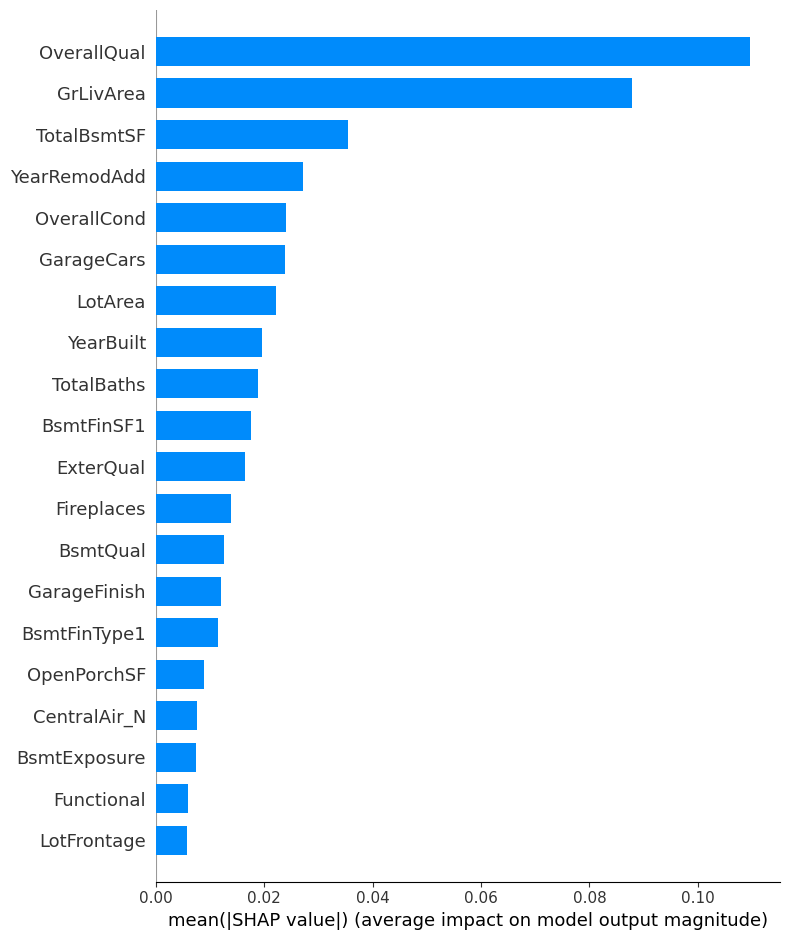

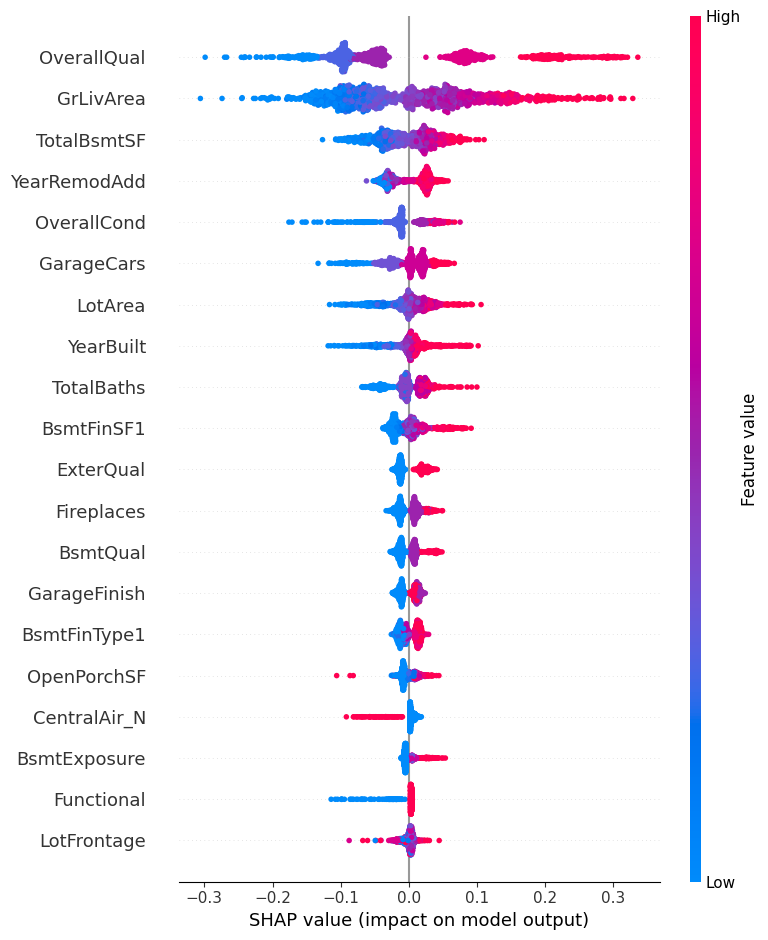

In [ ]:
import shap

# 建立 explainer，對 tree-based 模型可用 TreeExplainer
explainer = shap.Explainer(xgboost)
shap_values = explainer(X_train)

# summary_plot：總覽所有特徵的重要性（包含方向）
shap.summary_plot(shap_values, X_train, plot_type="bar")  # 欄位排名 + 貢獻程度（條狀圖）

shap.summary_plot(shap_values, X_train)  # 更細緻的色彩點圖（推薦）


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# 創建基模型
base_models = [
    ('rf', RandomForestRegressor(n_estimators=500, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42))
]

# 創建元模型（這裡使用一個簡單的 Ridge 模型）
meta_model = LinearRegression()

# 創建 StackingRegressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # 使用交叉驗證來避免數據洩漏
)

# 訓練堆疊模型
stacking_model.fit(X_train, y_train_log)

# 進行預測
stacking_preds = stacking_model.predict(X_test)

In [ ]:
# 預測 log(SalePrice)
stacking_preds = stacking_model.predict(final_test)

# 還原為 SalePrice
pred_test = np.expm1(stacking_preds)

# 製作提交檔
submission = pd.read_csv("sample_submission.csv")
submission['SalePrice'] = pred_test
submission.to_csv('submission.csv', index=False)